In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geopandas as gpd

In [3]:
df1=pd.read_csv('1950-2019actualtornadoes.csv')
df1.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [4]:
df1[df1.slon==0]

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc


In [5]:
states = gpd.read_file('US_map/tl_2017_us_state.shp')
states = states[states.STATEFP.astype(int) < 60]
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]

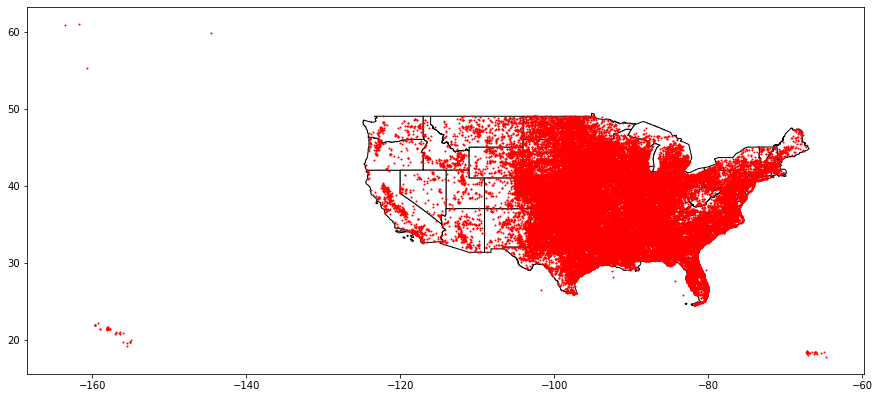

In [6]:
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))

ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=1, color='red')

ax.plot();

In [7]:
df1=df1[~df1.st.isin(['HI', 'AK','PR'])]
df1=df1[df1.slat>26]

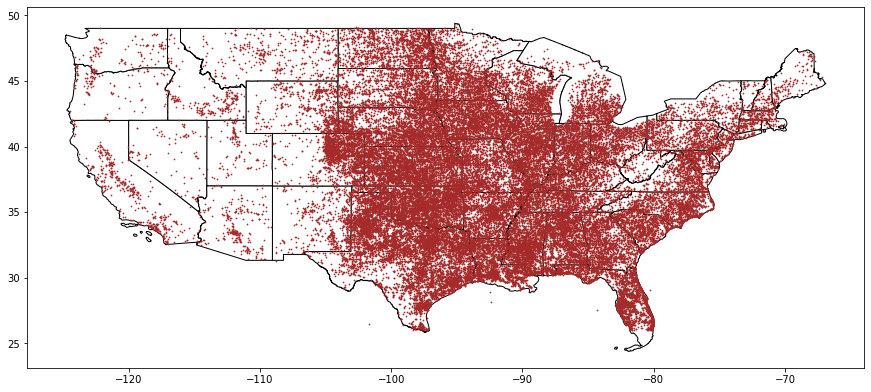

In [8]:
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=0.5, color='brown')
ax.plot();

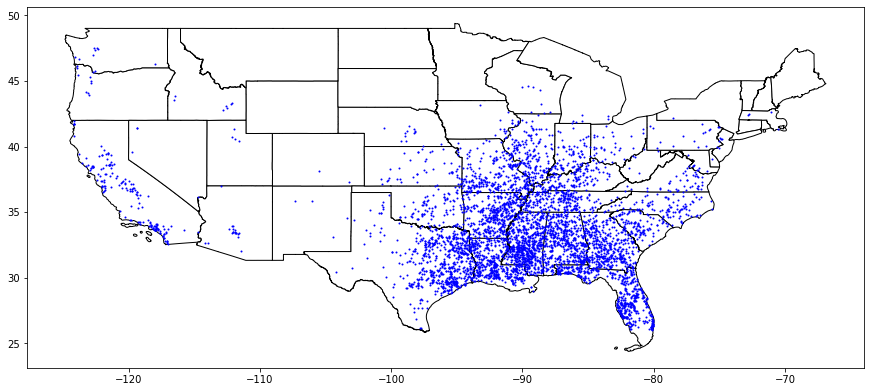

In [9]:
df_winter=df1[df1.mo.isin([12,1,2])]
gdf_winter= gpd.GeoDataFrame(
    df_winter, geometry=gpd.points_from_xy(df_winter.slon, df_winter.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf_winter.plot(ax=ax,markersize=1, color='blue')
ax.plot();

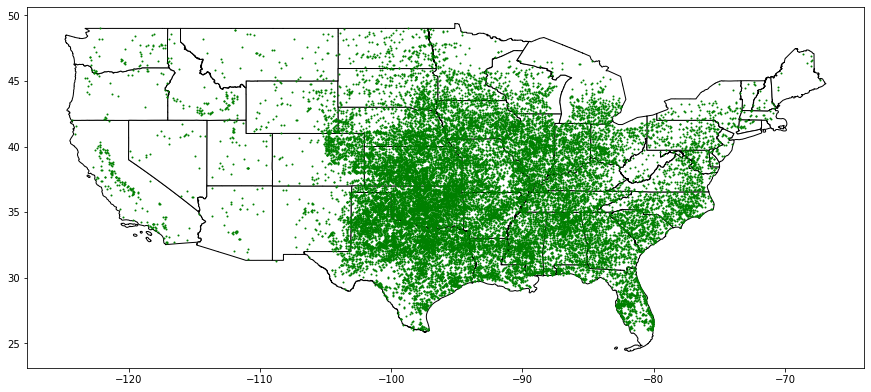

In [10]:
df_spring=df1[df1.mo.isin([3,4,5])]
gdf_spring= gpd.GeoDataFrame(
    df_spring, geometry=gpd.points_from_xy(df_spring.slon, df_spring.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf_spring.plot(ax=ax,markersize=1, color='green')
ax.plot();

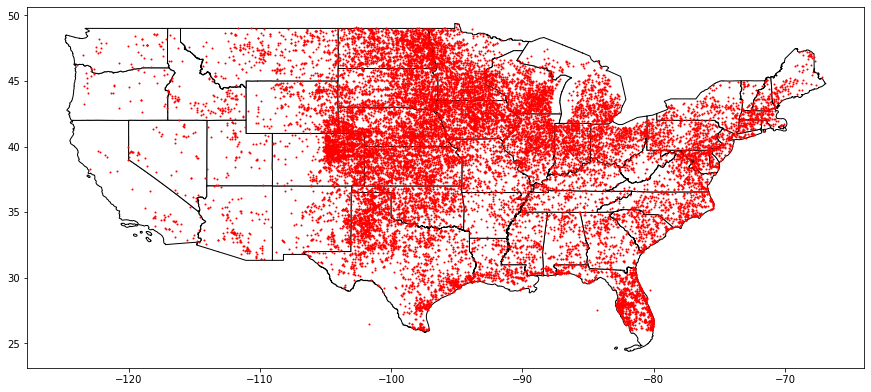

In [11]:
df_summer=df1[df1.mo.isin([6,7,8])]
gdf_summer= gpd.GeoDataFrame(
    df_summer, geometry=gpd.points_from_xy(df_summer.slon, df_summer.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf_summer.plot(ax=ax,markersize=1, color='red')
ax.plot();

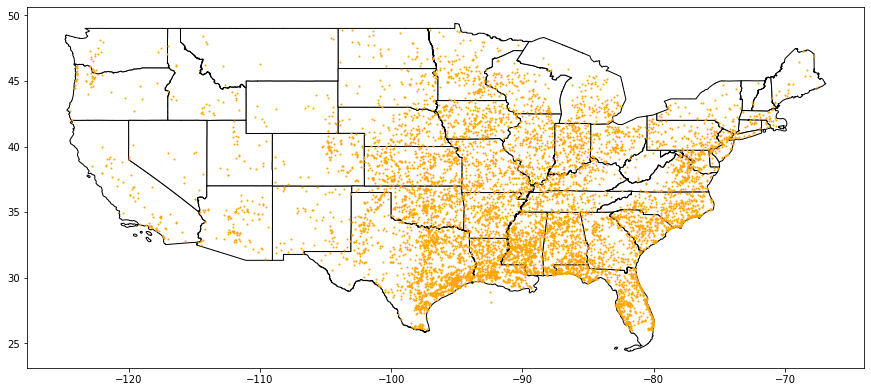

In [12]:
df_fall=df1[df1.mo.isin([9,10,11])]
gdf_fall= gpd.GeoDataFrame(
    df_fall, geometry=gpd.points_from_xy(df_fall.slon, df_fall.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf_fall.plot(ax=ax,markersize=1, color='orange')
ax.plot();

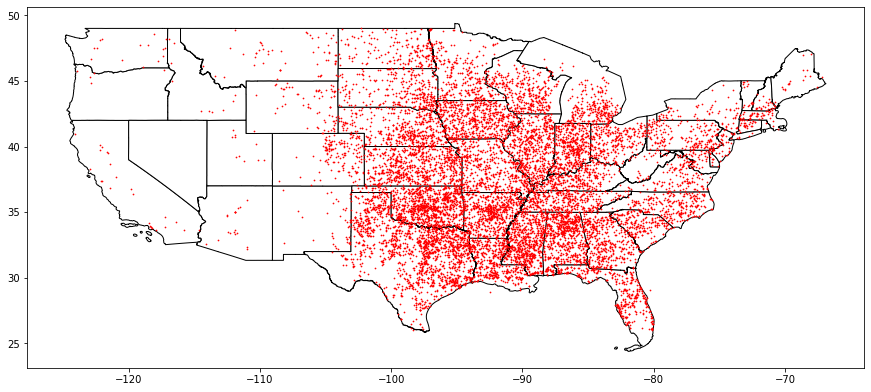

In [13]:
df1=df1[df1.mag>1]
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=0.5, color='red')
ax.plot();

In [14]:
df1_winter=df1[df1.mo.isin([12,1,2])]
df1_spring=df1[df1.mo.isin([3,4,5])]
df1_summer=df1[df1.mo.isin([6,7,8])]
df1_fall=df1[df1.mo.isin([9,10,11])]

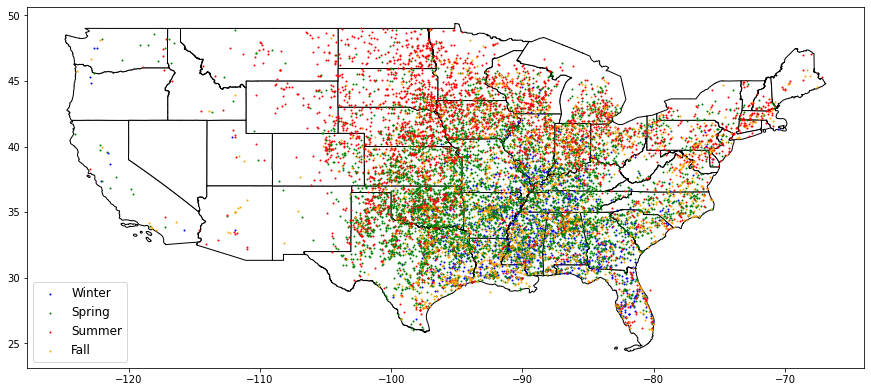

In [15]:
gdf1_winter= gpd.GeoDataFrame(
    df1_winter, geometry=gpd.points_from_xy(df1_winter.slon, df1_winter.slat))
gdf1_spring= gpd.GeoDataFrame(
    df1_spring, geometry=gpd.points_from_xy(df1_spring.slon, df1_spring.slat))
gdf1_summer= gpd.GeoDataFrame(
    df1_summer, geometry=gpd.points_from_xy(df1_summer.slon, df1_summer.slat))
gdf1_fall= gpd.GeoDataFrame(
    df1_fall, geometry=gpd.points_from_xy(df1_fall.slon, df1_fall.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1_winter.plot(ax=ax,markersize=1, color='b', label='Winter')
gdf1_spring.plot(ax=ax,markersize=1, color='g', label='Spring')
gdf1_summer.plot(ax=ax,markersize=1, color='r', label='Summer')
gdf1_fall.plot(ax=ax,markersize=1, color='orange', label='Fall')
plt.legend(loc='lower left',prop={"size":12})
ax.plot();

In [16]:
df1[df1.mo==3].head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,geometry
28,29,1950,3,16,1950-03-16,09:15:00,3,FL,12,1,...,150,1,1,1,109,0,0,0,0,POINT (-81.22000 29.65000)
30,31,1950,3,19,1950-03-19,13:15:00,3,LA,22,7,...,50,1,1,1,5,0,0,0,0,POINT (-91.00000 30.10000)
32,33,1950,3,26,1950-03-26,19:30:00,3,AR,5,4,...,150,1,1,1,19,59,0,0,0,POINT (-93.07000 34.12000)
33,34,1950,3,26,1950-03-26,19:31:00,3,AR,5,5,...,200,1,1,1,65,0,0,0,0,POINT (-91.83000 36.15000)
34,35,1950,3,26,1950-03-26,20:30:00,3,AR,5,6,...,600,1,1,1,119,0,0,0,0,POINT (-92.35000 34.70000)


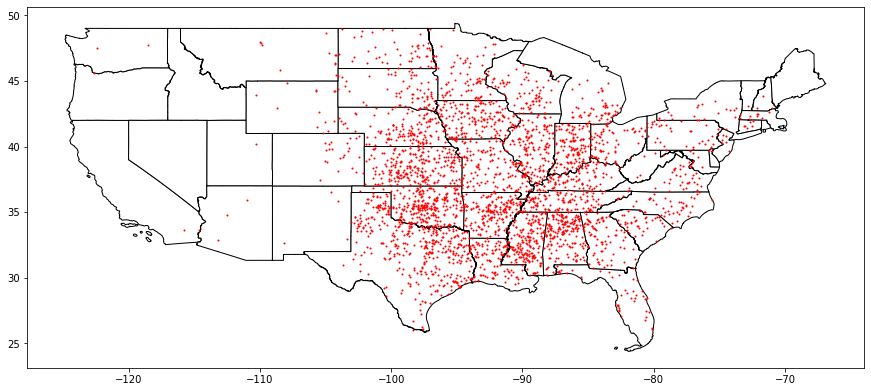

In [17]:
df1=df1[df1.mag>2]
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=1, color='red')
ax.plot();

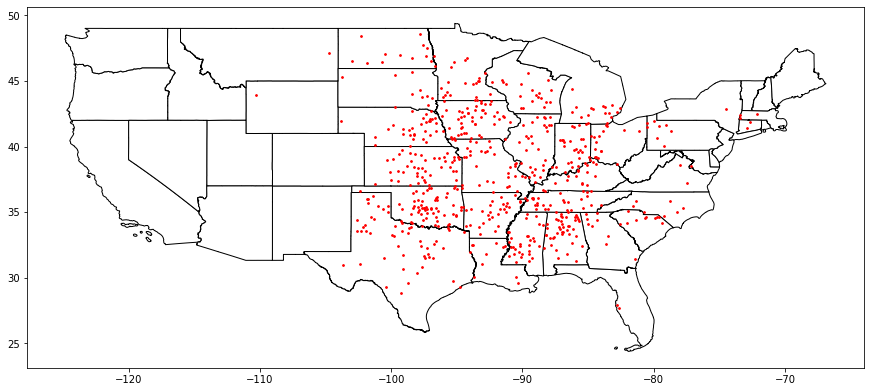

In [18]:
df1=df1[df1.mag>3]
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))
ax = states.plot(figsize=(15,18),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=3, color='red')
ax.plot();

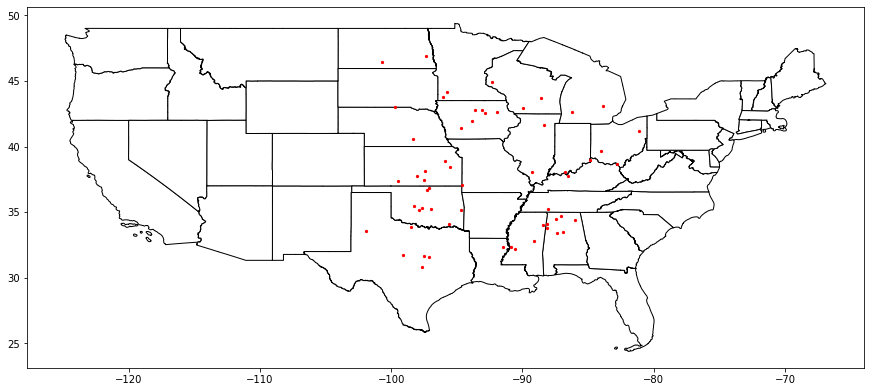

In [19]:
df1=df1[df1.mag>4]
gdf1= gpd.GeoDataFrame(
    df1, geometry=gpd.points_from_xy(df1.slon, df1.slat))
ax = states.plot(figsize=(15,15),color='w', edgecolor='black')
gdf1.plot(ax=ax,markersize=5, color='red')
ax.plot();